# MSc. Big Data & Finance
## Data Visualization Session 2 - Working with Data

Let's begin importing and acquiring data 

In [156]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, read_html

import urllib, json
from urllib.request import urlopen
from random import gauss, seed, randint
from datetime import datetime as dt


Reading csv files

In [3]:
btc = pd.read_csv("BTC-USD.csv")
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Reading Excel files

In [4]:
file="BTC-USD.xlsx"
sheet="Sheet1"

xl=pd.ExcelFile(file)
btc_xl=xl.parse(sheet)

btc_xl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Getting a table from a webpage

In [5]:
url='https://finance.yahoo.com/quote/BTC-EUR/history?p=BTC-EUR'
btc_html = pd.io.html.read_html(url)[0]

btc_html.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 23, 2020",7822.42,7838.45,7759.52,7766.44,7766.44,20743751680
1,"Jan 16, 2020",7901.09,7943.20,7732.77,7833.05,7833.05,28116699119
2,"Jan 15, 2020",7931.34,7970.70,7761.86,7896.19,7896.19,35955399490
3,"Jan 14, 2020",7310.82,7980.02,7316.26,7933.51,7933.51,40299311377
4,"Jan 13, 2020",7367.19,7361.88,7255.83,7313.75,7313.75,20190373250


Obviously, you will get much less data by scrapping the web

In [6]:
print(len(btc))
print(len(btc_html))

1949
101


Reading JSON Files

In [7]:
url="https://query1.finance.yahoo.com/v7/finance/options/MSFT"

json_url=urlopen(url)
data=json.loads(json_url.read())
data

{'optionChain': {'result': [{'underlyingSymbol': 'MSFT',
    'expirationDates': [1579824000,
     1580428800,
     1581033600,
     1581638400,
     1582243200,
     1582848000,
     1584662400,
     1587081600,
     1589500800,
     1592524800,
     1594944000,
     1600387200,
     1610668800,
     1616112000,
     1623974400,
     1642723200],
    'strikes': [115.0,
     120.0,
     125.0,
     130.0,
     135.0,
     136.0,
     137.0,
     138.0,
     139.0,
     140.0,
     141.0,
     142.0,
     143.0,
     144.0,
     145.0,
     146.0,
     147.0,
     148.0,
     149.0,
     150.0,
     152.5,
     155.0,
     157.5,
     160.0,
     162.5,
     165.0,
     167.5,
     170.0,
     172.5,
     175.0,
     177.5,
     180.0,
     182.5,
     185.0,
     187.5,
     190.0,
     195.0],
    'hasMiniOptions': False,
    'quote': {'language': 'en-US',
     'region': 'US',
     'quoteType': 'EQUITY',
     'triggerable': True,
     'quoteSourceName': 'Nasdaq Real Time Price',
     '

In [14]:
MSFT_options = data["optionChain"]["result"][0]["options"][0]["calls"]

MSFT_options = pd.DataFrame.from_dict(MSFT_options)

from datetime import datetime as dt

MSFT_options["expiration"]=MSFT_options["expiration"].apply(dt.fromtimestamp)
MSFT_options["lastTradeDate"]=MSFT_options["lastTradeDate"].apply(dt.fromtimestamp)


MSFT_options.head()

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,51.20,49.50,0.000000,REGULAR,MSFT200124C00115000,USD,2020-01-24 01:00:00,2.859378,True,49.80,2020-01-16 16:19:37,25,0.00000,115.0,25.0
1,46.95,45.05,0.000000,REGULAR,MSFT200124C00120000,USD,2020-01-24 01:00:00,2.343754,True,46.45,2020-01-17 21:19:50,1,0.00000,120.0,1.0
2,41.65,39.95,0.000000,REGULAR,MSFT200124C00125000,USD,2020-01-24 01:00:00,1.757814,True,41.80,2020-01-21 15:54:04,4,0.00000,125.0,1.0
3,36.80,35.05,0.720001,REGULAR,MSFT200124C00130000,USD,2020-01-24 01:00:00,1.750001,True,36.34,2020-01-22 18:14:54,23,2.02134,130.0,5.0
4,32.15,29.80,0.000000,REGULAR,MSFT200124C00135000,USD,2020-01-24 01:00:00,1.574221,True,30.30,2020-01-16 16:14:57,3,0.00000,135.0,3.0


## Handling Missing Data

In [15]:
df = pd.DataFrame ([[1, np.nan, 2],
                   [2,3,5],
                   [np.nan, 4, 6]])

df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


There is a dropna() function, but it is a bit harsh if you don't include some parameters

In [17]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Let's add an empty column

In [18]:
df[3]=np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


We can specify if you want to drop columns

In [19]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


There is also a "how" parameter that can be quite useful

In [21]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


You can also use a threshold

In [22]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Let's generate a random time series with one missing value

In [23]:
seed(10)
dates= pd.date_range("2020-01-01", periods=5, freq='D')
close = pd.Series((gauss(0,20),gauss(0,20),gauss(0,20),np.nan,gauss(0,20)), index=dates)
close

2020-01-01   -19.074340
2020-01-02    -9.181883
2020-01-03   -11.984989
2020-01-04          NaN
2020-01-05    -6.402848
Freq: D, dtype: float64

You can fill NaN with 0s

In [25]:
close.fillna(0)

2020-01-01   -19.074340
2020-01-02    -9.181883
2020-01-03   -11.984989
2020-01-04     0.000000
2020-01-05    -6.402848
Freq: D, dtype: float64

You can fill the time series with the next or the previous value as well

In [26]:
close.fillna(method="ffill")

2020-01-01   -19.074340
2020-01-02    -9.181883
2020-01-03   -11.984989
2020-01-04   -11.984989
2020-01-05    -6.402848
Freq: D, dtype: float64

In [27]:
close.fillna(method="bfill")

2020-01-01   -19.074340
2020-01-02    -9.181883
2020-01-03   -11.984989
2020-01-04    -6.402848
2020-01-05    -6.402848
Freq: D, dtype: float64

## Indexing data

Let's start by creating a data frame with multiple indexes

In [30]:
index= [('Stock A', 2018), ('Stock A', 2019),
        ('Stock B', 2018), ('Stock B', 2019),
       ('Stock C', 2018), ('Stock C', 2019)]

perf= [2.5, 7.6, 
        -1.2, 9.2,
       3.5, 4.3]

stocks=pd.Series(perf, index=index)
stocks

(Stock A, 2018)    2.5
(Stock A, 2019)    7.6
(Stock B, 2018)   -1.2
(Stock B, 2019)    9.2
(Stock C, 2018)    3.5
(Stock C, 2019)    4.3
dtype: float64

With MultiIndex.from_tuples() you can identify indexes and their levels

In [31]:
index= pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['Stock A', 'Stock B', 'Stock C'], [2018, 2019]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

You can then reindex you data properly

In [32]:
stocks=stocks.reindex(index)
stocks

Stock A  2018    2.5
         2019    7.6
Stock B  2018   -1.2
         2019    9.2
Stock C  2018    3.5
         2019    4.3
dtype: float64

Once you have indexed data you can stack it ou unstack it

In [35]:
stocks_unstack=stocks.unstack(level=1)
stocks_unstack

,2018,2019
Stock A,2.5,7.6
Stock B,-1.2,9.2
Stock C,3.5,4.3


In [37]:
stocks_restack=stocks_unstack.stack()
stocks_restack

Stock A  2018    2.5
         2019    7.6
Stock B  2018   -1.2
         2019    9.2
Stock C  2018    3.5
         2019    4.3
dtype: float64

Let's add a new colum to our data frame

In [40]:
stocks_df = pd.DataFrame({'total': stocks, 'div': [1.2, 1.5, 2.4, 2.7, 0.2, 0.3]})
stocks_df

total  div
Stock A 2018    2.5  1.2
        2019    7.6  1.5
Stock B 2018   -1.2  2.4
        2019    9.2  2.7
Stock C 2018    3.5  0.2
        2019    4.3  0.3

You can easily implement simple calculations within your data frame

In [41]:
stocks_exdiv = stocks_df['total'] - stocks_df['div']
stocks_exdiv.unstack()

,2018,2019
Stock A,1.3,6.1
Stock B,-3.6,6.5
Stock C,3.3,4.0


In [42]:
stocks_flat=stocks.reset_index(name='return')
stocks_flat

,level_0,level_1,return
0,Stock A,2018,2.5
1,Stock A,2019,7.6
2,Stock B,2018,-1.2
3,Stock B,2019,9.2
4,Stock C,2018,3.5
5,Stock C,2019,4.3


In [43]:
stocks_flat.columns=['stock', 'year', 'return']
stocks_flat

,stock,year,return
0,Stock A,2018,2.5
1,Stock A,2019,7.6
2,Stock B,2018,-1.2
3,Stock B,2019,9.2
4,Stock C,2018,3.5
5,Stock C,2019,4.3


# Concatenate, merge, append etc..

In [44]:
url="https://query1.finance.yahoo.com/v7/finance/options/AAPL"

json_url=urlopen(url)
data=json.loads(json_url.read())
AAPL_options = data["optionChain"]["result"][0]["options"][0]["calls"]

AAPL_options = pd.DataFrame.from_dict(AAPL_options)

AAPL_options["expiration"]=AAPL_options["expiration"].apply(dt.fromtimestamp)
AAPL_options["lastTradeDate"]=AAPL_options["lastTradeDate"].apply(dt.fromtimestamp)


AAPL_options.head()

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,134.55,130.60,0.000000,REGULAR,AAPL200124C00185000,USD,2020-01-24 01:00:00,4.547856,True,130.24,2020-01-16 16:17:17,7,0.000000,185.0,4.0
1,129.60,125.60,0.849991,REGULAR,AAPL200124C00190000,USD,2020-01-24 01:00:00,4.381840,True,129.45,2020-01-22 18:48:04,18,0.660957,190.0,15.0
2,124.90,120.60,0.000000,REGULAR,AAPL200124C00195000,USD,2020-01-24 01:00:00,2.453129,True,118.40,2020-01-14 19:46:23,7,0.000000,195.0,NaN
3,119.95,116.45,5.110001,REGULAR,AAPL200124C00200000,USD,2020-01-24 01:00:00,3.132815,True,119.44,2020-01-22 18:52:55,73,4.469518,200.0,55.0
4,114.95,110.90,0.000000,REGULAR,AAPL200124C00205000,USD,2020-01-24 01:00:00,2.656253,True,111.61,2020-01-21 20:28:15,2,0.000000,205.0,1.0


Concatenation can be done with a single line of code

In [46]:
options=pd.concat([AAPL_options, MSFT_options])
options.head()

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,134.55,130.60,0.000000,REGULAR,AAPL200124C00185000,USD,2020-01-24 01:00:00,4.547856,True,130.24,2020-01-16 16:17:17,7,0.000000,185.0,4.0
1,129.60,125.60,0.849991,REGULAR,AAPL200124C00190000,USD,2020-01-24 01:00:00,4.381840,True,129.45,2020-01-22 18:48:04,18,0.660957,190.0,15.0
2,124.90,120.60,0.000000,REGULAR,AAPL200124C00195000,USD,2020-01-24 01:00:00,2.453129,True,118.40,2020-01-14 19:46:23,7,0.000000,195.0,NaN
3,119.95,116.45,5.110001,REGULAR,AAPL200124C00200000,USD,2020-01-24 01:00:00,3.132815,True,119.44,2020-01-22 18:52:55,73,4.469518,200.0,55.0
4,114.95,110.90,0.000000,REGULAR,AAPL200124C00205000,USD,2020-01-24 01:00:00,2.656253,True,111.61,2020-01-21 20:28:15,2,0.000000,205.0,1.0


However, by simply concatenating, you have the risk of having multiple lines with the same index

In [48]:
options= pd.concat([AAPL_options, MSFT_options], verify_integrity=True)

ValueError: Indexes have overlapping values: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36],
           dtype='int64')

The append() function is another way of concatenating

In [49]:
options = AAPL_options.append(MSFT_options)
options.head()

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
0,134.55,130.60,0.000000,REGULAR,AAPL200124C00185000,USD,2020-01-24 01:00:00,4.547856,True,130.24,2020-01-16 16:17:17,7,0.000000,185.0,4.0
1,129.60,125.60,0.849991,REGULAR,AAPL200124C00190000,USD,2020-01-24 01:00:00,4.381840,True,129.45,2020-01-22 18:48:04,18,0.660957,190.0,15.0
2,124.90,120.60,0.000000,REGULAR,AAPL200124C00195000,USD,2020-01-24 01:00:00,2.453129,True,118.40,2020-01-14 19:46:23,7,0.000000,195.0,NaN
3,119.95,116.45,5.110001,REGULAR,AAPL200124C00200000,USD,2020-01-24 01:00:00,3.132815,True,119.44,2020-01-22 18:52:55,73,4.469518,200.0,55.0
4,114.95,110.90,0.000000,REGULAR,AAPL200124C00205000,USD,2020-01-24 01:00:00,2.656253,True,111.61,2020-01-21 20:28:15,2,0.000000,205.0,1.0


In [50]:
options.tail()

,ask,bid,change,contractSize,contractSymbol,currency,expiration,impliedVolatility,inTheMoney,lastPrice,lastTradeDate,openInterest,percentChange,strike,volume
32,0.02,0.01,0.0,REGULAR,MSFT200124C00182500,USD,2020-01-24 01:00:00,0.531255,False,0.02,2020-01-21 17:45:45,137,0.0,182.5,4.0
33,0.04,0.02,0.0,REGULAR,MSFT200124C00185000,USD,2020-01-24 01:00:00,0.644535,False,0.01,2020-01-21 16:41:58,262,0.0,185.0,1.0
34,0.04,0.02,0.0,REGULAR,MSFT200124C00187500,USD,2020-01-24 01:00:00,0.710940,False,0.01,2020-01-21 15:51:19,111,0.0,187.5,NaN
35,0.06,0.00,0.0,REGULAR,MSFT200124C00190000,USD,2020-01-24 01:00:00,0.781252,False,0.02,2020-01-10 21:51:56,11,0.0,190.0,30.0
36,0.04,0.00,0.0,REGULAR,MSFT200124C00195000,USD,2020-01-24 01:00:00,0.859376,False,0.01,2020-01-21 15:58:37,6,0.0,195.0,1.0


To avoid the indexing issue, you can concatenate with keys

In [52]:
pd.concat([AAPL_options, MSFT_options], keys=['Apple', 'Microsoft'])

ask     bid    change contractSize       contractSymbol  \
Apple     0   134.55  130.60  0.000000      REGULAR  AAPL200124C00185000   
          1   129.60  125.60  0.849991      REGULAR  AAPL200124C00190000   
          2   124.90  120.60  0.000000      REGULAR  AAPL200124C00195000   
          3   119.95  116.45  5.110001      REGULAR  AAPL200124C00200000   
          4   114.95  110.90  0.000000      REGULAR  AAPL200124C00205000   
          5   109.50  105.60  0.000000      REGULAR  AAPL200124C00210000   
          6   104.95  100.90  2.709999      REGULAR  AAPL200124C00215000   
          7    99.65   95.80  1.589996      REGULAR  AAPL200124C00220000   
          8    94.50   90.60  0.000000      REGULAR  AAPL200124C00225000   
          9    92.45   88.40  0.000000      REGULAR  AAPL200124C00227500   
          10   89.95   86.50  2.699997      REGULAR  AAPL200124C00230000   
          11   87.45   83.60  0.000000      REGULAR  AAPL200124C00232500   
          12   84.95   81.10  0.000000      REGULAR  AAPL200124C00235000   
          13   82.15   78.10  0.000000      REGULAR  AAPL200124C00237500   
          14   79.95   75.65  0.000000      REGULAR  AAPL200124C00240000   
          15   77.45   73.70  0.000000      REGULAR  AAPL200124C00242500   
          16   73.65   71.60  1.610001      REGULAR  AAPL200124C00245000   
          17   71.35   68.90  0.000000      REGULAR  AAPL200124C00247500   
          18   69.95   65.90  1.799995      REGULAR  AAPL200124C00250000   
          19   66.30   64.35  3.279999      REGULAR  AAPL200124C00252500   
          20   63.50   61.45  0.769997      REGULAR  AAPL200124C00255000   
          21   62.45   59.00  1.290001      REGULAR  AAPL200124C00257500   
          22   59.95   55.90 -0.820000      REGULAR  AAPL200124C00260000   
          23   57.45   53.50 -0.469997      REGULAR  AAPL200124C00262500   
          24   53.45   52.05  1.400001      REGULAR  AAPL200124C00265000   
          25   52.45   48.70  1.500000      REGULAR  AAPL200124C00267500   
          26   49.95   46.20  1.669998      REGULAR  AAPL200124C00270000   
          27   45.50   44.65  1.299999      REGULAR  AAPL200124C00272500   
          28   43.05   42.05  1.199997      REGULAR  AAPL200124C00275000   
          29   40.50   38.70 -0.470001      REGULAR  AAPL200124C00277500   
...              ...     ...       ...          ...                  ...   
Microsoft 7    29.10   26.95  0.000000      REGULAR  MSFT200124C00138000   
          8    28.30   25.85  0.000000      REGULAR  MSFT200124C00139000   
          9    26.05   25.65 -0.840000      REGULAR  MSFT200124C00140000   
          10   25.20   24.55  3.370001      REGULAR  MSFT200124C00141000   
          11   24.90   23.45  3.250000      REGULAR  MSFT200124C00142000   
          12   23.55   22.25  0.000000      REGULAR  MSFT200124C00143000   
          13   22.60   21.35  0.000000      REGULAR  MSFT200124C00144000   
          14   21.05   20.55  0.000000      REGULAR  MSFT200124C00145000   
          15   20.05   19.55  0.969999      REGULAR  MSFT200124C00146000   
          16   19.60   18.45  0.000000      REGULAR  MSFT200124C00147000   
          17   18.50   17.60  0.000000      REGULAR  MSFT200124C00148000   
          18   17.05   16.55 -1.600000      REGULAR  MSFT200124C00149000   
          19   16.00   15.60 -0.950000      REGULAR  MSFT200124C00150000   
          20   13.55   13.15 -1.229999      REGULAR  MSFT200124C00152500   
          21   11.00   10.65 -1.110001      REGULAR  MSFT200124C00155000   
          22    8.50    8.15 -1.010000      REGULAR  MSFT200124C00157500   
          23    6.05    5.55 -0.700000      REGULAR  MSFT200124C00160000   
          24    3.55    3.30 -0.600000      REGULAR  MSFT200124C00162500   
          25    1.34    1.30 -0.770000      REGULAR  MSFT200124C00165000   
          26    0.32    0.30 -0.430000      REGULAR  MSFT200124C00167500   
          27    0.09    0.08 -0.180000      REGULAR  MSFT200124C0

Let's create a new data frame with random stocks

In [54]:
stocks1= stocks_exdiv.unstack()
stocks1

,2018,2019
Stock A,1.3,6.1
Stock B,-3.6,6.5
Stock C,3.3,4.0


In [56]:
index= [('Stock D', 2018), ('Stock D', 2017),
        ('Stock E', 2018), ('Stock E', 2017)]

perf= [2.3, 0.2, 
        -1.1, 1]

stocks2 = pd.Series(perf, index=index)
index=pd.MultiIndex.from_tuples(index)
stocks2=stocks2.reindex(index)
stocks2=stocks2.unstack(level=1)
stocks2


,2017,2018
Stock D,0.2,2.3
Stock E,1.0,-1.1


You can specify the type of join method you prefer 

In [57]:
pd.concat([stocks1, stocks2], join="inner")

,2018
Stock A,1.3
Stock B,-3.6
Stock C,3.3
Stock D,2.3
Stock E,-1.1


You can also specify which columns you want to preserve

In [59]:
pd.concat([stocks1, stocks2], join_axes=[stocks2.columns])

,2017,2018
Stock A,NaN,1.3
Stock B,NaN,-3.6
Stock C,NaN,3.3
Stock D,0.2,2.3
Stock E,1.0,-1.1


Now let's have a look at the merge function with different data frames

In [60]:
df1 = pd.DataFrame({'stock':['Company A','Company B','Company C','Company D','Company E'],
                   'sector':['Utilities', 'Oil & Gas', 'Oil & Gas', 'Financial', 'Consumer']})
df1

,stock,sector
0,Company A,Utilities
1,Company B,Oil & Gas
2,Company C,Oil & Gas
3,Company D,Financial
4,Company E,Consumer


In [61]:
df2 = pd.DataFrame({'stock':['Company B','Company D','Company C','Company A','Company E'],
                   'return':[1.2, 2.4, -2.7, 4.5, 7.5]})
df2

,stock,return
0,Company B,1.2
1,Company D,2.4
2,Company C,-2.7
3,Company A,4.5
4,Company E,7.5


The merge() function automatically matches and rearranges the data frame

In [63]:
df3 = pd.merge(df1, df2)
df3

,stock,sector,return
0,Company A,Utilities,4.5
1,Company B,Oil & Gas,1.2
2,Company C,Oil & Gas,-2.7
3,Company D,Financial,2.4
4,Company E,Consumer,7.5


In [64]:
df4 = pd.DataFrame({'sector': ['Utilities', 'Oil & Gas', 'Financial', 'Consumer'],
                   'style':['Defensive','Sensitive','Cyclical','Cyclical']})

df4

,sector,style
0,Utilities,Defensive
1,Oil & Gas,Sensitive
2,Financial,Cyclical
3,Consumer,Cyclical


In [65]:
df5 = pd.merge(df3,df4)
df5

,stock,sector,return,style
0,Company A,Utilities,4.5,Defensive
1,Company B,Oil & Gas,1.2,Sensitive
2,Company C,Oil & Gas,-2.7,Sensitive
3,Company D,Financial,2.4,Cyclical
4,Company E,Consumer,7.5,Cyclical


# Let's get started with visualization !

In [66]:
#For viz
from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For Yahoo finance data
from pandas_datareader import data as pdr



Let's get some stock price data from Yahoo Finance for Tesla, Microsoft, Netflix & Alibaba

In [157]:
startdate=dt(2019,1,1)
enddate=dt(2019,12,31)

tickers=['TSLA','MSFT','NFLX','BABA']

all_data = pdr.get_data_yahoo(tickers, start=startdate, end=enddate)['Adj Close']
all_data.head()




Symbols,BABA,MSFT,NFLX,TSLA
Date,,,,
2019-01-02,136.699997,99.646614,267.660004,310.119995
2019-01-03,130.600006,95.980820,271.200012,300.359985
2019-01-04,139.750000,100.444817,297.570007,317.690002
2019-01-07,143.100006,100.572922,315.339996,334.959991
2019-01-08,146.789993,101.302139,320.269989,335.350006


The all_data data frame doesn't have a flat profile, which is much better for visualization purpose.
<br> Let's try to write a simple function to get a flat data set with the same stock data.

In [158]:
def get(tickers, first, last):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker, start=first, end=last))
    datas=map(data, tickers)
    df= pd.concat(datas, keys=tickers, names=["Ticker", "Date"])
    return(df.reset_index())

all_data_flat=get(tickers, startdate, enddate)
all_data_flat.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,TSLA,2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600.0,310.119995
1,TSLA,2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200.0,300.359985
2,TSLA,2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100.0,317.690002
3,TSLA,2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200.0,334.959991
4,TSLA,2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500.0,335.350006


With a simple line of code, you can represent all 4 time series as a line plot. 
<br>The relplot() function allows to plot relations (here price over time).
<br> By indicating hue="Ticker" we pass on to the function that we want each stock price to have a specific color

C:\Users\Ano Kuhanathan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


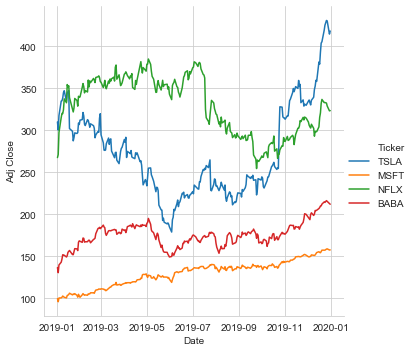

In [81]:
g = sns.relplot(x="Date", y="Adj Close", hue="Ticker", kind="line", data=all_data_flat)
g

You can also represent each series in a different column without using subplots.

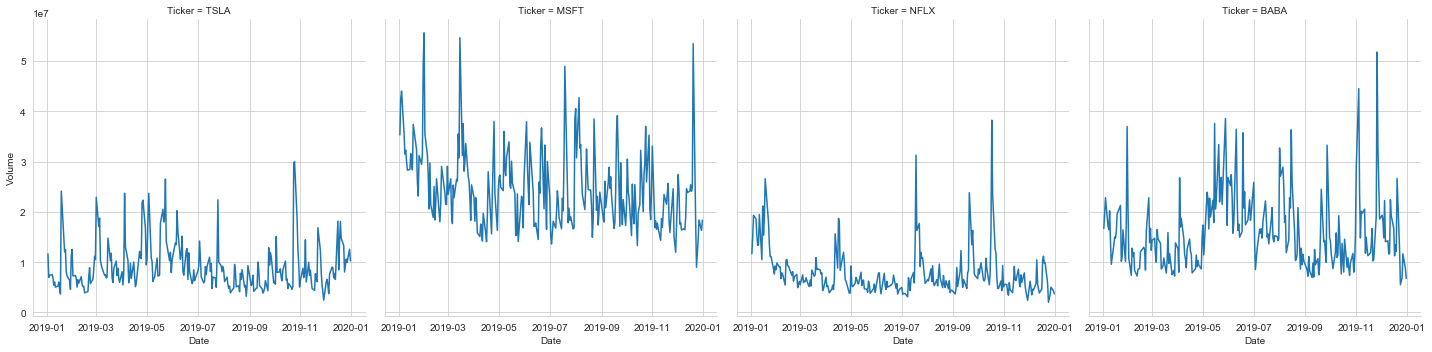

In [83]:
g = sns.relplot(x="Date", y="Volume", col="Ticker", kind="line", data=all_data_flat)
g

Let's focus on Tesla, calculate different moving averages and graph the results.

In [86]:
TSLA=all_data_flat[all_data_flat['Ticker']=='TSLA']
ma_day=[10, 20, 50]


for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    TSLA[column_name]=TSLA['Adj Close'].rolling(ma).mean()
    
TSLA.tail()


C:\Users\Ano Kuhanathan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Ticker,Date,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
247,TSLA,2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700.0,425.250000,387.851001,361.369502,334.104601
248,TSLA,2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900.0,430.940002,395.675000,366.470502,337.565601
249,TSLA,2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700.0,430.380005,402.745001,371.425002,340.978201
250,TSLA,2019-12-30,429.000000,409.260010,428.790009,414.700012,12586400.0,414.700012,408.376001,375.663002,344.032801
251,TSLA,2019-12-31,421.290009,402.079987,405.000000,418.329987,10285700.0,418.329987,412.059000,379.836002,347.260401


The final savefig() function allows the user to save the plot as an image file. 
<br> You will definitely need it for your 1st assignement.

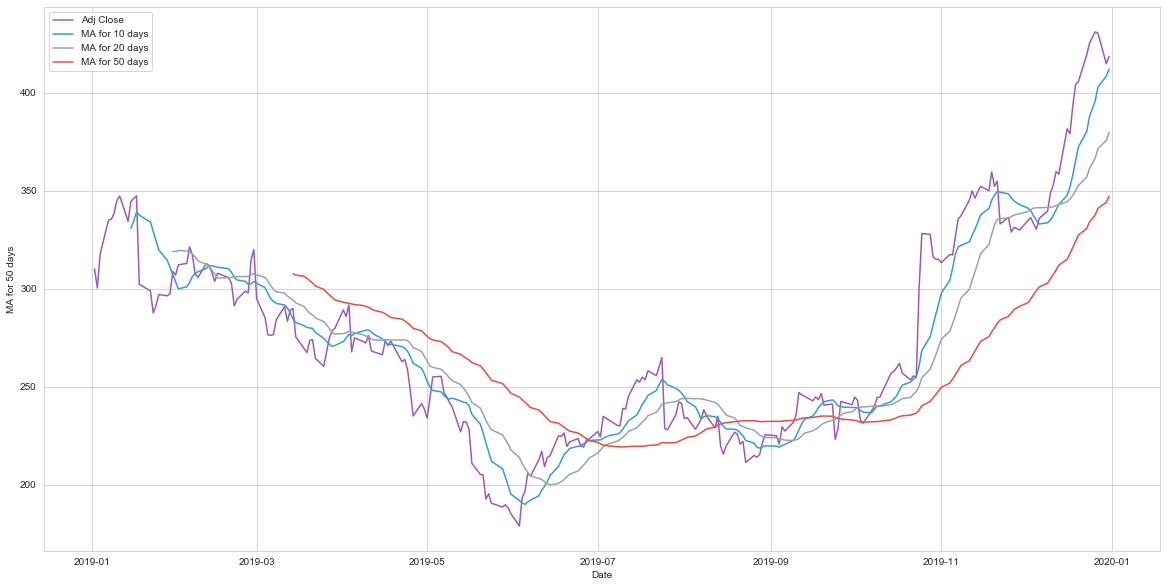

<Figure size 432x288 with 0 Axes>

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
plot_series=['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']
#colors=['r','b','g','c']
colors=["#9b59b6","#3498db", "#95a5a6","#e74c3c"]

i=0
for serie in plot_series:
    sns.lineplot(x="Date",
                y=serie,
                color=colors[i],
                data=TSLA)
    i+=1

ax.legend(plot_series, facecolor="w")
plt.show()
plt.savefig('plot.png')

Now, let's have a look at daily returns

C:\Users\Ano Kuhanathan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


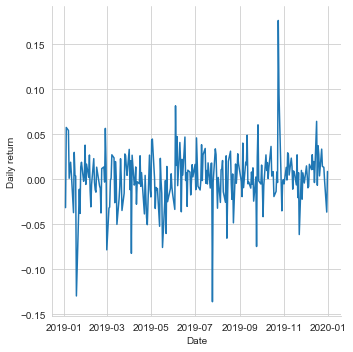

In [90]:
TSLA['Daily return']=TSLA['Adj Close'].pct_change()
sns.relplot(x="Date", y="Daily return", kind="line", data=TSLA)

The distribution plot is a much better way to look at this type of dataset.

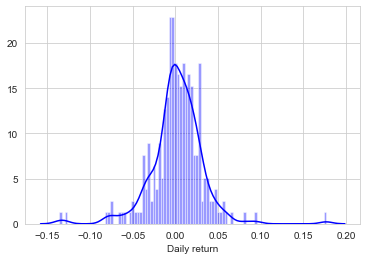

In [95]:
g=sns.distplot(TSLA["Daily return"].dropna(), bins=100, color="blue")

Let's have a look at some correlation measures

In [103]:
tickers=['TSLA','MSFT','NFLX','BABA']

all_data = pdr.get_data_yahoo(tickers, start=startdate, end=enddate)['Adj Close']


In [104]:
stock_ret = all_data.pct_change()

joinplot() is a very usefull function to look at 2 series
<br> The "reg" option is also a nice representation that allows to see instantly a linear regression

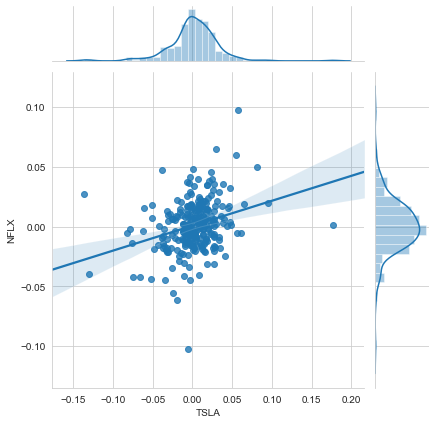

In [111]:
sns.jointplot('TSLA','NFLX', stock_ret, kind="reg")

The pairplot() function enables to have a look at series pairwise at large scale.
<br> The diagonal being the distribution of each serie.

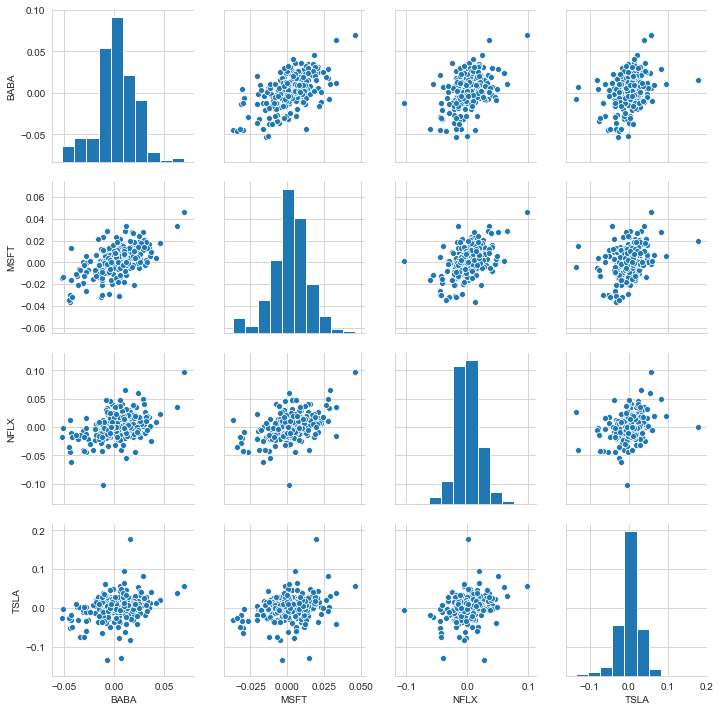

In [109]:
sns.pairplot(stock_ret.dropna())

By using the zoning of the pairplot, you can play around and customise the representation (colors, type of graphs etc..)

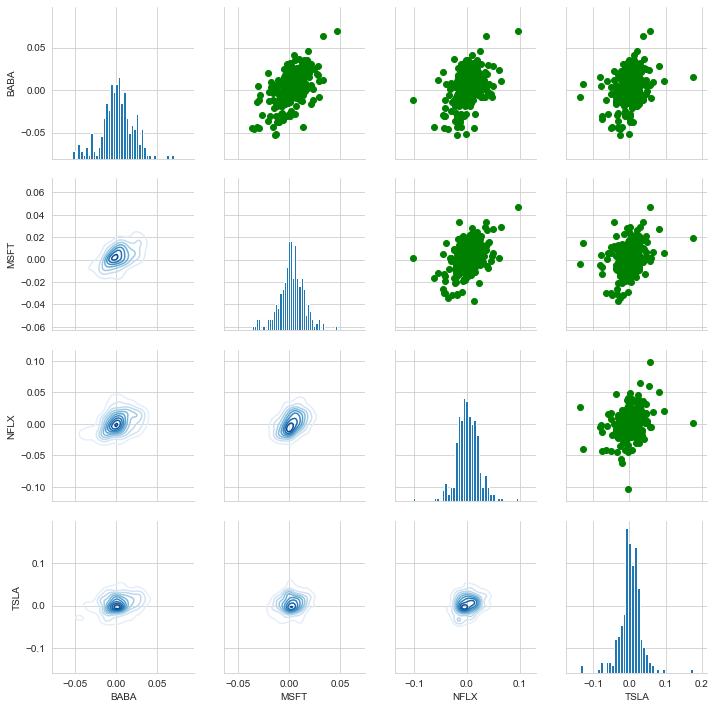

In [115]:
returns_fig = sns.PairGrid(stock_ret.dropna())

returns_fig.map_upper(plt.scatter, color='green')
returns_fig.map_lower(sns.kdeplot,cmap="Blues")
returns_fig.map_diag(plt.hist, bins=40)

No way of talking about correlation without the usual heatmap !

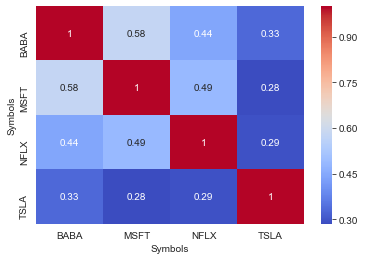

In [118]:
sns.heatmap(stock_ret.corr(), cmap="coolwarm", annot=True)

Let's now plot Risk/returns and customize the figure with annotations.

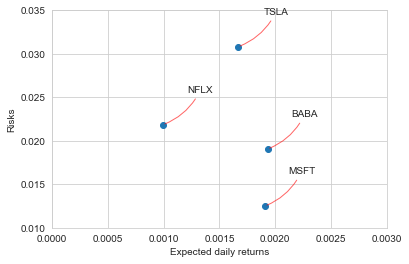

In [137]:
stocks = stock_ret.dropna()
plt.scatter(stocks.mean(), stocks.std())

plt.ylim([0.01, 0.035])
plt.xlim([0,0.003])

plt.xlabel('Expected daily returns')
plt.ylabel('Risks')

for label, x, y in zip(stocks.columns, stocks.mean(), stocks.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext=(50,30),
        textcoords = "offset points", ha ='right', va='bottom',
        arrowprops=dict(arrowstyle="-", color="r", alpha=0.6, connectionstyle='arc3, rad=-0.2'))

## Exercice : Implement and plot a Monte-Carlo Simulation for a stock

In [139]:
#Time horizon
days = 365


#Drift
mu = stocks.mean()['TSLA']

#Volatility
sigma = stocks.std()['TSLA']

In [145]:
def mcsimulation(start_price, days, mu, sigma):
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1, days):
        shock[x]=np.random.normal(loc=mu, scale=sigma)
#        shock[x]=np.random.normal(loc=mu, scale=sigma*np.sqrt(dt))
        drift[x]=mu * dt
        price[x]=price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return(price)
        

Text(0.5, 1.0, 'MC Simulation for Tesla')

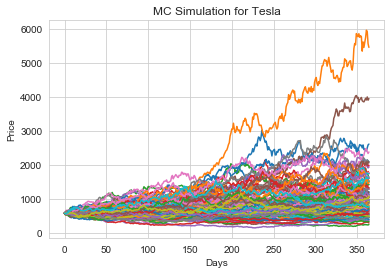

In [146]:
start_price=569.56

for run in range(100):
    plt.plot(mcsimulation(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("MC Simulation for Tesla")

In [148]:
runs=10000
simulations=np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range (runs):
    simulations[run]= mcsimulation(start_price, days, mu, sigma)[days-1];

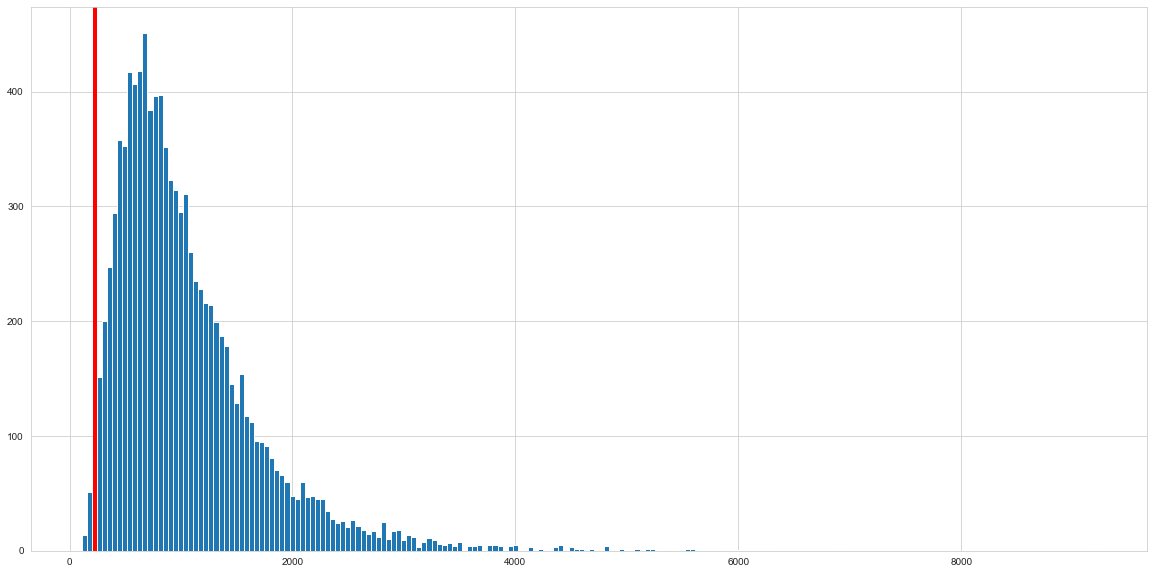

In [153]:
q=np.percentile(simulations, 1)
plt.figure(figsize=(20,10))
plt.hist(simulations, bins=200)
plt.axvline(x=q, linewidth=4, color="r")


In [168]:
print("VaR 99%: " + str(round(start_price-q,3)))

VaR 99%: 343.202


This is it for the visualization part. 
<br>Because of time contraint, we cannot go through all possible visualization for time series. 
<br>You can experiment quite easily with Seaborn boxplots and violon plots for instance.
<br>We also left out of the course network representations.
<br> 
## We have just enough time to have a look at geographic representation ! 

In [170]:
import geopandas as gpd
import libpysal as lp
import esda
from shapely.geometry import Point

Geopandas comes with some built-in data

In [171]:
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


The main concept to be familiar with in geographic representation is how to handle polygons

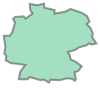

In [172]:
world.loc["DEU",'geometry']

Let's load French regional data

In [173]:
fp = "regions-20161121.shx"
map_df = gpd.read_file(fp)
map_df.head()

,osm_id,name,code_insee,nom_cl,insee_cl,nuts2,iso3166_2,wikipedia,wikidata,nb_dep,nb_comm,surf_km2,geometry
0,2562137,Guadeloupe,01,Basse-Terre,97105,FR91,GP,fr:Guadeloupe,Q17012,1,32,1634.180741,"MULTIPOLYGON (((-61.80976 16.27270, -61.80976 ..."
1,2473088,Martinique,02,Fort-de-France,97209,FR92,MQ,fr:Martinique,Q17054,1,34,1089.366976,"MULTIPOLYGON (((-61.22908 14.82247, -61.22895 ..."
2,2502058,Guyane,03,Cayenne,97302,FR93,FR-GF,fr:Guyane,Q3769,1,22,83550.746297,"MULTIPOLYGON (((-54.60278 2.33370, -54.60268 2..."
3,2470060,La Réunion,04,Saint-Denis,97411,FR94,RE,fr:La Réunion,Q17070,1,24,2504.808455,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
4,1363069,Mayotte,06,Dzaoudzi,97608,None,FR-YT,fr:Mayotte,Q17063,1,17,377.730620,"MULTIPOLYGON (((45.03968 -12.72175, 45.04005 -..."


Now let's load the presidential elections' results

In [174]:
presid = pd.read_csv("premiertour.csv", sep=";")
presid.head()

,Region,Macron,Le Pen,Fillon,Melanchon,Hamon,Dupont Aignan,Lassalle,Poutou,Asselineau,Arthaud,Cheminade,Blancs,Nuls,Inscrits,Exprimés
0,Ile-de-France,1 612 516,708 026,1 249 586,1 224 978,430 324,226 203,36 350,45 705,64 391,23 582,9 795,87 595,32 458,7 199 231,5 631 456
1,Auvergne-Rhone-Alpes,1 025 872,867 591,845 905,805 588,256 532,215 883,53 247,43 509,41 336,24 656,7 597,78 647,30 798,5 416 712,4 187 716
2,Nouvelle-Aquitaine,851 304,640 148,602 830,703 439,240 157,155 581,91 904,49 646,26 664,21 439,6 262,63 983,30 437,4 329 942,3 389 374
3,Hauts-de-France,630 285,1 003 216,521 373,633 313,166 630,160 721,22 410,33 652,26 043,29 193,5 688,58 622,25 548,4 241 887,3 232 524
4,Occitanie,740 031,762 087,566 036,734 193,216 349,135 403,75 482,35 216,28 603,16 776,5 524,56 860,27 267,4 194 294,3 315 700


Let's try to merge all this and plot it

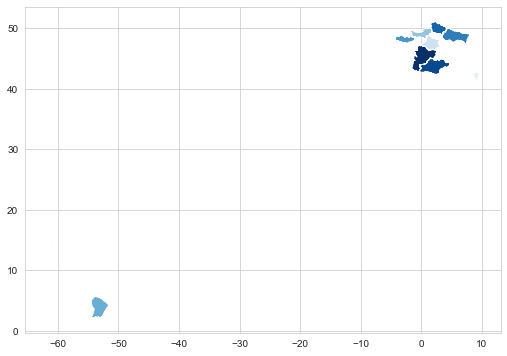

In [175]:
merged = map_df.set_index('name').join(presid.set_index('Region'))
variable = 'Macron'
vmin, vmax = 120, 220
merged= merged.dropna()

fig, ax = plt.subplots(1, figsize=(10,6))

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax)

Not  quite what we were expecting !
<br> Let's clean the datasets by removing accents and regions that are from the mainland

In [176]:
map_df=map_df.replace("La Réunion","La Reunion")
map_df=map_df.replace("Auvergne-Rhône-Alpes","Auvergne-Rhone-Alpes")
map_df=map_df.replace("Bourgogne-Franche-Comté","Bourgogne-Franche-Comte") 
map_df=map_df.replace("Provence-Alpes-Côte d'Azur","Provence-Alpes-Cote d'Azur")
map_df=map_df.replace("Île-de-France","Ile-de-France")
map_df=map_df.replace("Pays-de-la-Loire","Pays de la Loire")

#map_df.head()
list_del=("La Reunion","Martinique",'Français ','Guadeloupe', 'Guyane','Mayotte','Nouvelle-Calédonie',"Polynésie Française",
          "Saint-Pierre-et-Miquelon","Wallis-et-Futuna")

map_df2 = map_df[~map_df.name.isin(list_del)]
presid2 = presid[~presid.Region.isin(list_del)]
map_df2
presid2

,Region,Macron,Le Pen,Fillon,Melanchon,Hamon,Dupont Aignan,Lassalle,Poutou,Asselineau,Arthaud,Cheminade,Blancs,Nuls,Inscrits,Exprimés
0,Ile-de-France,1 612 516,708 026,1 249 586,1 224 978,430 324,226 203,36 350,45 705,64 391,23 582,9 795,87 595,32 458,7 199 231,5 631 456
1,Auvergne-Rhone-Alpes,1 025 872,867 591,845 905,805 588,256 532,215 883,53 247,43 509,41 336,24 656,7 597,78 647,30 798,5 416 712,4 187 716
2,Nouvelle-Aquitaine,851 304,640 148,602 830,703 439,240 157,155 581,91 904,49 646,26 664,21 439,6 262,63 983,30 437,4 329 942,3 389 374
3,Hauts-de-France,630 285,1 003 216,521 373,633 313,166 630,160 721,22 410,33 652,26 043,29 193,5 688,58 622,25 548,4 241 887,3 232 524
4,Occitanie,740 031,762 087,566 036,734 193,216 349,135 403,75 482,35 216,28 603,16 776,5 524,56 860,27 267,4 194 294,3 315 700
5,Grand-Est,615 776,825 604,586 390,484 810,151 296,182 200,30 508,34 468,30 223,24 272,6 078,55 656,20 290,3 873 402,2 971 625
6,Provence-Alpes-Cote d'Azur,520 978,774 781,615 524,515 415,113 365,119 050,29 554,21 314,25 950,10 437,4 569,44 480,15 421,3 567 740,2 750 937
7,Pays de la Loire,575 832,364 267,516 428,403 455,143 491,109 842,16 988,26 340,15 529,16 018,3 731,44 175,16 603,2 705 170,2 191 921
8,Bretagne,581 076,306 644,380 815,385 736,180 827,87 928,19 097,27 092,13 419,14 296,3 400,34 417,13 865,2 453 683,2 000 330
9,Normandie,422 960,452 586,370 105,362 426,113 705,98 907,13 896,23 804,14 301,15 194,3 544,35 209,13 181,2 398 182,1 891 428


Let's give it another try now

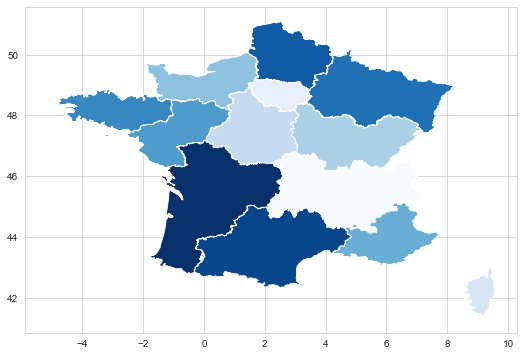

In [177]:
merged = map_df2.set_index('name').join(presid2.set_index('Region'))
variable = 'Macron'
vmin, vmax = 120, 220
merged= merged.dropna()

fig, ax = plt.subplots(1, figsize=(10,6))

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax)

## Much better !
## Congrats for getting until here.
## Now it's your turn to produce something for the 6th of February
